**Autograd is a core component of PyTorch that provides automatic differentiation for tensor operations. It enables gradient computation, which is essential for training machine learning models using optimization algorithms like gradient descent**

# Gradient Without using Autograd

e.g. 1

x = 3.5 <br>
y = x**2

find gradient of y w.r.t x <br>
that is dy/dx

In [ ]:
# function to calculate dy/dx
def dy_dx(x):
    return 2*x

dy_dx(3.5) # dy/dx at x = 3.5

7.0

e.g. 2 <br>

x = 3.2  <br>
y = x**3 <br>
z = y + 4 <br>
find dz/dx ?

In [ ]:
"""
dz/dx = dz/dy * dy/dx
      = 1 * 3 * x**2
      = 3 * x**2
"""

def dz_dx(x):
    return 3 * x**2

dz_dx(3.2) # dz/dx at x = 3.2

30.720000000000006

**as we can see if we use more complex funciton in funciton according to chain rule equation will get bigger and bigger which is hard to calculate manually, thats why we use Autograd**

# Gradients using Autograd

**Conceptually, autograd keeps a record of data (tensors) and all executed operations (along with the resulting new tensors) in a directed acyclic graph (DAG) consisting of Function objects. In this DAG, leaves are the input tensors, roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.**

In [ ]:
import torch

In [ ]:
# solving e.g. 1

x = torch.tensor(3.5,requires_grad=True)
y = x ** 2

In [ ]:
x

tensor(3.5000, requires_grad=True)

In [ ]:
y

tensor(12.2500, grad_fn=<PowBackward0>)

In [ ]:
# finding gradient of y w.r.t x
y.backward()

x.grad

tensor(7.)

In [ ]:
# solving e.g. 2

x = torch.tensor(3.2,requires_grad=True)
y = x ** 3
z = y + 4

In [ ]:
x

tensor(3.2000, requires_grad=True)

In [ ]:
y

tensor(32.7680, grad_fn=<PowBackward0>)

In [ ]:
z

tensor(36.7680, grad_fn=<AddBackward0>)

In [ ]:
# finding gradient of z w.r.t x
z.backward()
x.grad

tensor(30.7200)

In [ ]:
# e.g. 3

x = torch.tensor(2.0,requires_grad=True)
y = 4*x**2 + 3*x + 2
z = torch.sin(y)

In [ ]:
# finding dz/dx
z.backward()
x.grad

tensor(8.0594)

In [ ]:
# finding gradient without Autograd
"""
dz/dx = dz/dy * dy/dx
"""
def dz_dx(x):
    return torch.cos(4*x**2 + 3*x + 2) * (8*x + 3)

dz_dx(x)

tensor(8.0594, grad_fn=<MulBackward0>)

In [ ]:
"""
bydefault gradient is not calculated on intermidiate nodes, only on leaf nodes
gradients are calculated
"""
y.grad

<ipython-input-20-10b3a7061f6d>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  y.grad


In [ ]:
# simple nural netwwork example

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True) # weights
b = torch.randn(3, requires_grad=True)    # baises

In [ ]:
w

tensor([[ 2.0332, -2.0101,  0.9197],
        [ 1.8458,  2.0124,  1.8019],
        [ 0.8441,  0.5051, -0.7897],
        [ 1.3931, -0.2252, -0.8167],
        [-0.1840, -0.2139,  1.0697]], requires_grad=True)

In [ ]:
b

tensor([ 1.0052,  2.2432, -0.1055], requires_grad=True)

In [ ]:
# function for calculating binarycross entropy loss
def binary_cross_entropy_loss(y_pred, y_true):
  pred = torch.clamp(y_pred, min=1e-8, max=1-1e-8)
  return -(y_true * torch.log(pred) + (1 - y_true) * torch.log(1 - pred))

In [ ]:
# forward pass
z = torch.matmul(x, w)+b
y_pred = torch.sigmoid(z)

# computing loss
loss = binary_cross_entropy_loss(y_pred, y).mean()
# if we use following loss function, then no need to use sigmoid , it will do it
# internaly, and use mean as reduction parameter is used by default
# loss = torch.nn.functional.binary_cross_entropy_with_logits(y_pred, y)

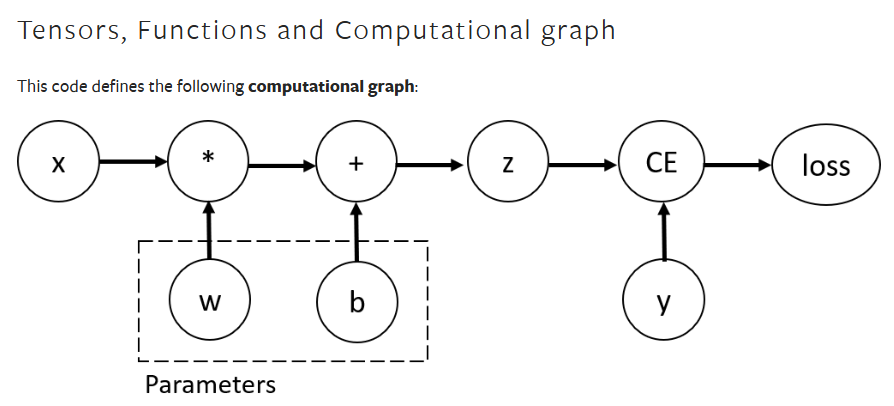

In [ ]:
x

tensor([1., 1., 1., 1., 1.])

In [ ]:
y

tensor([0., 0., 0.])

In [ ]:
z

tensor([6.9374, 2.3115, 2.0795], grad_fn=<AddBackward0>)

In [ ]:
y_pred

tensor([0.9990, 0.9098, 0.8889], grad_fn=<SigmoidBackward0>)

In [ ]:
loss

tensor(3.8472, grad_fn=<MeanBackward0>)

In [ ]:
loss

tensor([0.0662, 1.3207, 0.4835], grad_fn=<NegBackward0>)

In [ ]:
"""
To optimize weights of parameters in the neural network, we need to compute the
derivatives of our loss function with respect to parameters (W and b)
"""

# backpropogation
loss.backward()

In [ ]:
print(w.grad)
print(b.grad)

tensor([[0.3330, 0.3033, 0.2963],
        [0.3330, 0.3033, 0.2963],
        [0.3330, 0.3033, 0.2963],
        [0.3330, 0.3033, 0.2963],
        [0.3330, 0.3033, 0.2963]])
tensor([0.3330, 0.3033, 0.2963])


## clearning gradient

In [ ]:
q1 = torch.tensor(2.5, requires_grad=True)
print(q1)

tensor(2.5000, requires_grad=True)


In [ ]:
# forward pass
q2 = q1**2
print(q2)

tensor(6.2500, grad_fn=<PowBackward0>)


In [ ]:
# backward pass
q2.backward()

In [ ]:
"""
when you run forward pass and backward pass only 2nd time then gradient
result will get add up each time you run forwardpass and backwardpass,
gradient not get cleared itself, we have to do it manually.
"""


print(q1.grad)

tensor(5.)


In [ ]:
q1.grad.zero_() # we are making q1.grad tensor 0
print(q1.grad)

tensor(0.)


## Disabling  gradinent tracking

while training you do backword pass that time you need gradient tracking, but while testing you don't backpropogate that time you can disable the gradient tracking on your tensors

In [ ]:
# forward pass
x = torch.tensor(3.7,requires_grad=True)
y = 3*(x**2) + 2*x
print(y)

tensor(48.4700, grad_fn=<AddBackward0>)


In [ ]:
# backward pass
y.backward()

In [ ]:
print(x.grad)

tensor(24.2000)


In [ ]:
# clearing gradient
x.grad.zero_()
print(x.grad)

tensor(0.)


In [ ]:
print(x)
print(y)

tensor(3.7000, requires_grad=True)
tensor(48.4700, grad_fn=<AddBackward0>)


In [ ]:
# option 1
x.requires_grad_(False)
print(x)

tensor(3.7000)


In [ ]:
y = 3*(x**2) + 2*x
print(y)

tensor(48.4700)


In [ ]:
# 2nd option - detach() => Creates a new tensor that shares data with the original
# tensor but detaches it from the computation graph. This tensor doesn't track gradients.

x = torch.tensor(1.4,requires_grad=True)
print(x)

y = x.detach()
print(y)

tensor(1.4000, requires_grad=True)
tensor(1.4000)


In [ ]:
z1 = x ** 3
z2 = y ** 3

In [ ]:
print(z1)
print(z2)

tensor(2.7440, grad_fn=<PowBackward0>)
tensor(2.7440)


In [ ]:
z1.backward()

In [ ]:
z2.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
x.grad

tensor(5.8800)

In [ ]:
print(y.grad)

None


In [ ]:
# option3 - no_grad()
"""
A context manager that temporarily disables gradient tracking for all tensors
within its scope.

Gradients are not computed for any operation inside the torch.no_grad() block,
even for tensors that have requires_grad=True
"""


tr1 = torch.tensor(-1.0,requires_grad=True)
print(tr1)

tensor(-1., requires_grad=True)


In [ ]:
with torch.no_grad():
    tr2 = tr1**2
    print(tr2)

tensor(1.)


In [ ]:
tr2.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
tr3 = tr1**3
print(tr3)

tensor(-1., grad_fn=<PowBackward0>)


In [ ]:
tr3.backward()

In [ ]:
tr1.grad

tensor(3.)